<h1> Task 1: Data Cleaning & Preprocessing

<h2> Objective: Learn how to clean and prepare raw data for ML.<br>
Tools: Python, Pandas, NumPy, Matplotlib/Seaborn</h2>

<h3>Task to be performed:</h3>
<ol>
<li>Import the dataset and explore basic info (nulls, data types).
<li>Handle missing values using mean/median/imputation.
<li>Convert categorical features into numerical using encoding.
<li>Normalize/standardize the numerical features.
<li>Visualize outliers using boxplots and remove them.
</ol>

<h3>Dataset:- Titanic Dataset downloaded from Kaggle </h3>

In [1]:
#Importing the required libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

<h5>T-1:- Import the dataset and explore basic info (nulls, data types).

In [2]:
# Importing the dataset
df = pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.shape

(891, 12)

In [6]:
# Finding missing values
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


<h5>T-2:- Handle missing values using mean/median/imputation.</h5>

In [7]:
# Age is filled with median
df['Age'].fillna(df['Age'].median(), inplace=True)

In [8]:
# Embarked is filled with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [9]:
# Drop 'Cabin' due to many missing values
df.drop(columns=['Cabin'], inplace=True)

In [10]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


<h5>T-3:- Convert categorical features into numerical using encoding.</h5>

In [11]:
# Encode categorical features
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])         # male=1, female=0
df['Embarked'] = le.fit_transform(df['Embarked'])  # C=0, Q=1, S=2

<h5>T-4:- Normalize/standardize the numerical features.</h5>

In [12]:
# Normalize/standardize numerical features
scaler = StandardScaler()
num_cols = ['Age', 'Fare', 'SibSp', 'Parch']
df[num_cols] = scaler.fit_transform(df[num_cols])

<h5>T-5:- Visualize outliers using boxplots and remove them.</h5>

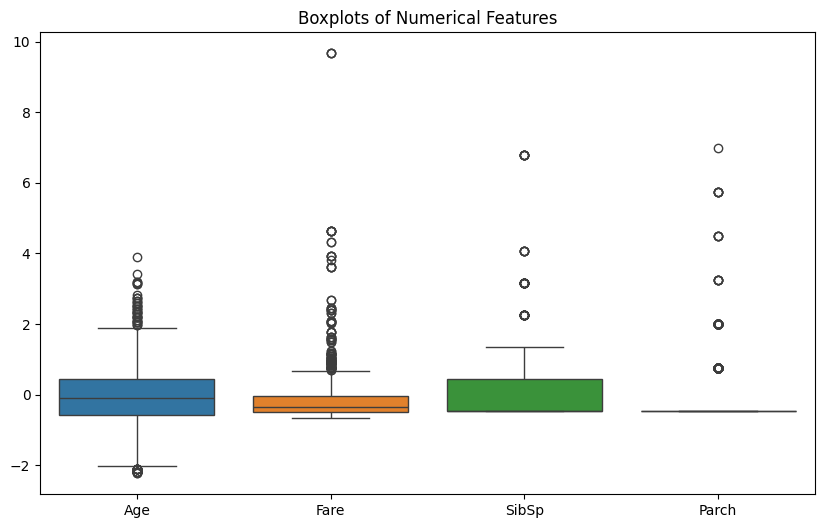

In [13]:
# Visualize outliers using boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[num_cols])
plt.title('Boxplots of Numerical Features')
plt.show()

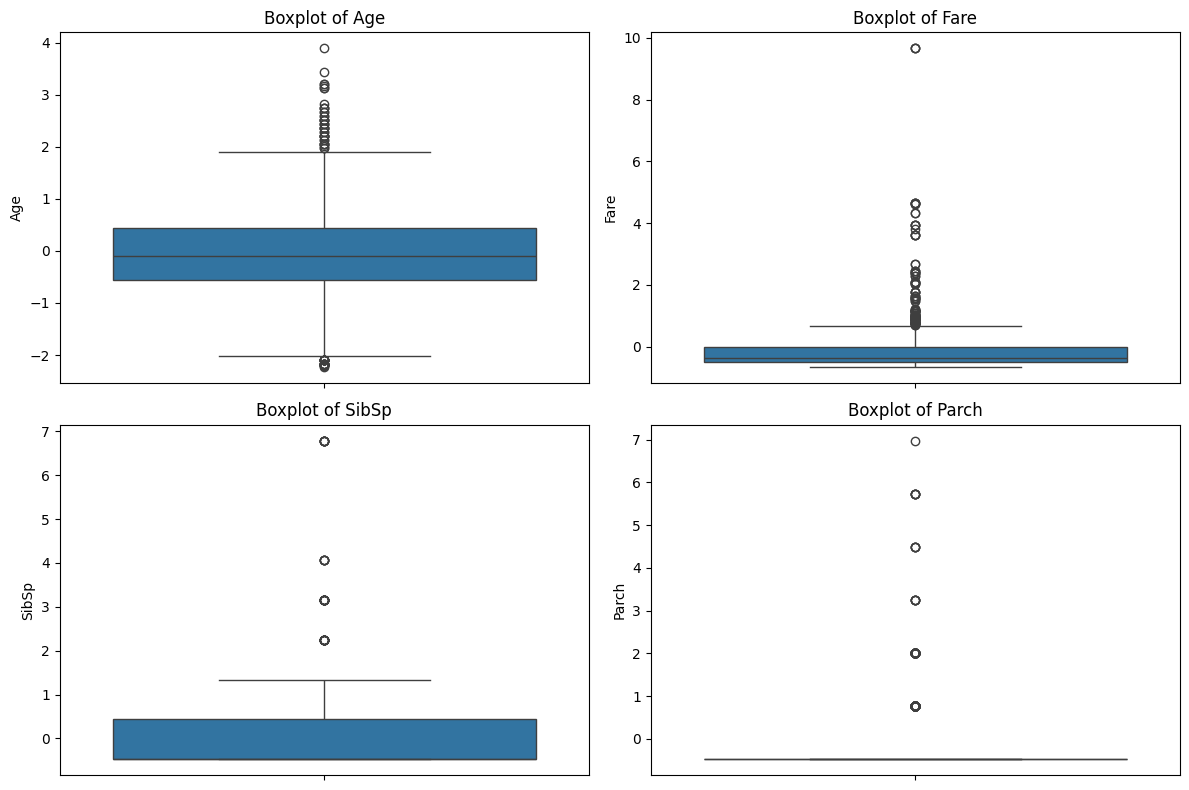

In [14]:
# Visualize outliers using boxplots of every variable separately
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [18]:
# Remove outliers using IQR method
def remove_outliers(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

In [19]:
df_cleaned = remove_outliers(df, num_cols)

<h1>Final Result</h1>

In [20]:
print(f"\nData shape after removing outliers: {df_cleaned.shape}")


Data shape after removing outliers: (577, 11)


In [21]:
df_cleaned.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,-0.565736,0.432793,-0.473674,A/5 21171,-0.502445,2
2,3,1,3,"Heikkinen, Miss. Laina",0,-0.258337,-0.474545,-0.473674,STON/O2. 3101282,-0.488854,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.433312,0.432793,-0.473674,113803,0.420730,2
4,5,0,3,"Allen, Mr. William Henry",1,0.433312,-0.474545,-0.473674,373450,-0.486337,2
5,6,0,3,"Moran, Mr. James",1,-0.104637,-0.474545,-0.473674,330877,-0.478116,1
